# Assignment 8 - Data Science in Finance and Insurance
Submission by: Dennis Goldenberg

In [58]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import KFold;

## Part [a]

In [59]:
imgs = np.load("mnist.npz")

#Flatten images
X_train = imgs['x_train'].reshape((60000, 28 * 28))
X_test = imgs['x_test'].reshape((10000, 28 * 28))

#scale their features
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)
y_train = imgs['y_train']
y_test = imgs['y_test']

## Part [b]

In [ ]:
#Create logistic regressor
log_reg = LogisticRegression().fit(X_train_scaled, y_train);

#Calculate classification accuracy on train and test sets
train_accuracy = log_reg.score(X_train_scaled, y_train);
test_accuracy = log_reg.score(X_test_scaled, y_test);

In [61]:
#Report train and test accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  0.94345
Test Accuracy:  0.9246


## Part [c]

In [104]:
#Set values of hyperparamter C to check, as well as k for num. folds
C_s = np.hstack((np.linspace(0.001, 0.02, 20), np.linspace(0.02, 0.1, 9)))
k = 10
random_seed = 2018

In [ ]:
#Create array for CV scores
alt_CV_scores = np.empty(shape = (len(C_s), k));

#Create KFold object for splitting
splitter2 = KFold(n_splits = k, shuffle = True, random_state = random_seed)

#Run Cross-Validation
for i, (train_idx, test_idx) in enumerate(splitter2.split(X_train_scaled)):
    x_train_1 = X_train_scaled[train_idx]
    y_train_CV_1 = y_train[train_idx]
    x_test_1 = X_train_scaled[test_idx]
    y_test_CV_1 = y_train[test_idx]

    #Run Regression with each possible value of C on train set in given split
    regressors = np.asarray([LogisticRegression(C = C_s[w]).fit(x_train_1, y_train_CV_1) for w in range(len(C_s))]);
    
    #Get accuracy score for given set in said split
    scores_i = np.asarray([regressors[z].score(x_test_1, y_test_CV_1) for z in range(len(C_s))])
    alt_CV_scores[:,i] = scores_i

In [105]:
#Average out to get CV scores for each value of C
avg_CV_scores = np.average(alt_CV_scores, axis = 1)

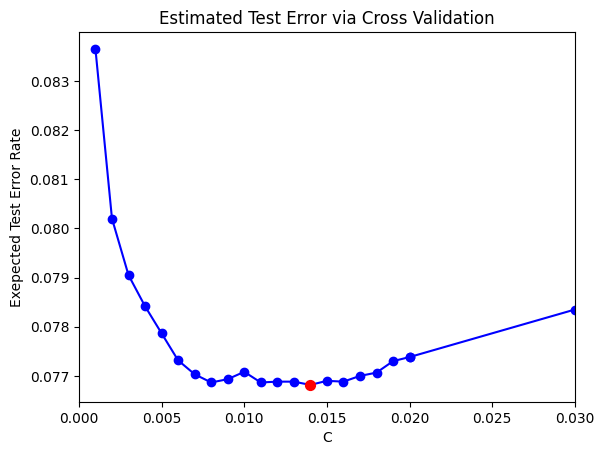

In [112]:
#Generate Error Rates
Error_rates = 1 - avg_CV_scores
C_min = C_s[np.argmin(Error_rates)]

#Plot error scores
plt.scatter(C_s, Error_rates, color = 'blue')
plt.plot(C_s, Error_rates, color = 'blue')

#Plot minimum error score
plt.scatter(C_min, np.min(Error_rates), color = 'red', s = 50, zorder = 2)

#set axes limits and labels
plt.xlabel("C")
plt.xlim((0, 0.03))
plt.ylabel("Exepected Test Error Rate")
plt.title("Estimated Test Error via Cross Validation");
plt.show()

In [113]:
#Get optimal Value of C
print("Optimal Value for C: ", C_min)

Optimal Value for C:  0.014000000000000002


## Part [d]

In [ ]:
#Run logistic regression using optimal C
optimal_log_reg = LogisticRegression(C = C_min).fit(X_train_scaled, y_train);
train_accuracy_score = optimal_log_reg.score(X_train_scaled, y_train)
test_accuracy_score = optimal_log_reg.score(X_test_scaled, y_test)

In [115]:
#Report train and test accuracy
print("Train Accuracy: ", train_accuracy_score)
print("Test Accuracy: ", test_accuracy_score)

Train Accuracy:  0.9373833333333333
Test Accuracy:  0.9265
